In [1]:
# from google.colab import files
# files.upload()

In [2]:
# # # !pip install  kaggle
# !mkdir -p ~/.kaggle# 
# !cp kaggle.json ~/.kaggle# /
# !ls ~/.kagg# le
# !chmod 600 /root/.kaggle/kaggle.json

In [2]:
!kaggle competitions download -c bri-data-hackathon-pa


  0%|          | 0.00/384k [00:00<?, ?B/s]
100%|##########| 384k/384k [00:00<00:00, 3.00MB/s]
100%|##########| 384k/384k [00:00<00:00, 2.99MB/s]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('bri-data-hackathon-pa/train.csv')
df_test = pd.read_csv('bri-data-hackathon-pa/test.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11153 non-null  object 
 1   job_duration_in_current_job_level      11153 non-null  float64
 2   person_level                           11153 non-null  object 
 3   job_duration_in_current_person_level   11153 non-null  float64
 4   job_duration_in_current_branch         11153 non-null  float64
 5   Employee_type                          11153 non-null  object 
 6   gender                                 11153 non-null  int64  
 7   age                                    11153 non-null  int64  
 8   marital_status_maried(Y/N)             11153 non-null  object 
 9   number_of_dependences                  11153 non-null  int64  
 10  Education_level                        11153 non-null  object 
 11  GP

In [4]:
df_train.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,1985,30,9,8,2,3,0,47.18,0.0,0


###Fillna

In [5]:
df_train.fillna(method='ffill', inplace=True)

###Show All columns and unique values

In [6]:
for i in df_train.columns:
  print(i)
  print(df_train[i].unique())
  print()

job_level
['JG04' 'JG05' 'JG03']

job_duration_in_current_job_level
[1.35277493 1.2922848  2.56515107 2.82842712 1.11803399 1.32287566
 1.08166538 1.38564065 2.73861279 1.22474487 1.15325626 1.25698051
 1.41421356 2.39791576 2.6925824  1.60623784 1.63401346 1.47309199
 1.93649167 2.66082694 1.5        1.19163753 2.23606798 2.84253408
 1.58113883 2.34520788 2.85832119 2.44948974 1.68226038 0.64807407
 0.70710678 2.30867928 2.70739727 2.81424946 1.73205081 1.44222051
 1.6583124  2.58263431 2.5        1.03923048 1.55563492 1.
 1.82482876 1.52643375 2.54950976 0.57445626 0.5        0.91104336
 2.53377189 1.70880075 0.41231056 2.67768557 2.12132034 2.4657656
 2.72396769 2.79821372 2.48394847 0.9591663  2.29128785 0.81853528
 2.16101828 2.64575131 0.76157731 2.         2.43310501 0.8660254
 2.51594913 2.61342687 2.63058929 2.59807621 1.87082869 2.2737634
 2.14009346 2.32808935 2.41453929 0.         0.28284271 1.8493242
 2.2181073  2.1023796  2.25388553 2.04205779 1.78044938 2.36220236
 2.381

###Label encoder

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [9]:
df_baru = MultiColumnLabelEncoder(columns=df_train.select_dtypes(exclude=[np.number])).fit_transform(df_train)

In [10]:
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11153 non-null  int32  
 1   job_duration_in_current_job_level      11153 non-null  float64
 2   person_level                           11153 non-null  int32  
 3   job_duration_in_current_person_level   11153 non-null  float64
 4   job_duration_in_current_branch         11153 non-null  float64
 5   Employee_type                          11153 non-null  int32  
 6   gender                                 11153 non-null  int64  
 7   age                                    11153 non-null  int64  
 8   marital_status_maried(Y/N)             11153 non-null  int32  
 9   number_of_dependences                  11153 non-null  int64  
 10  Education_level                        11153 non-null  int32  
 11  GP

###Find Outlier

In [11]:
import seaborn as sns

In [12]:
from scipy import stats
import numpy as np

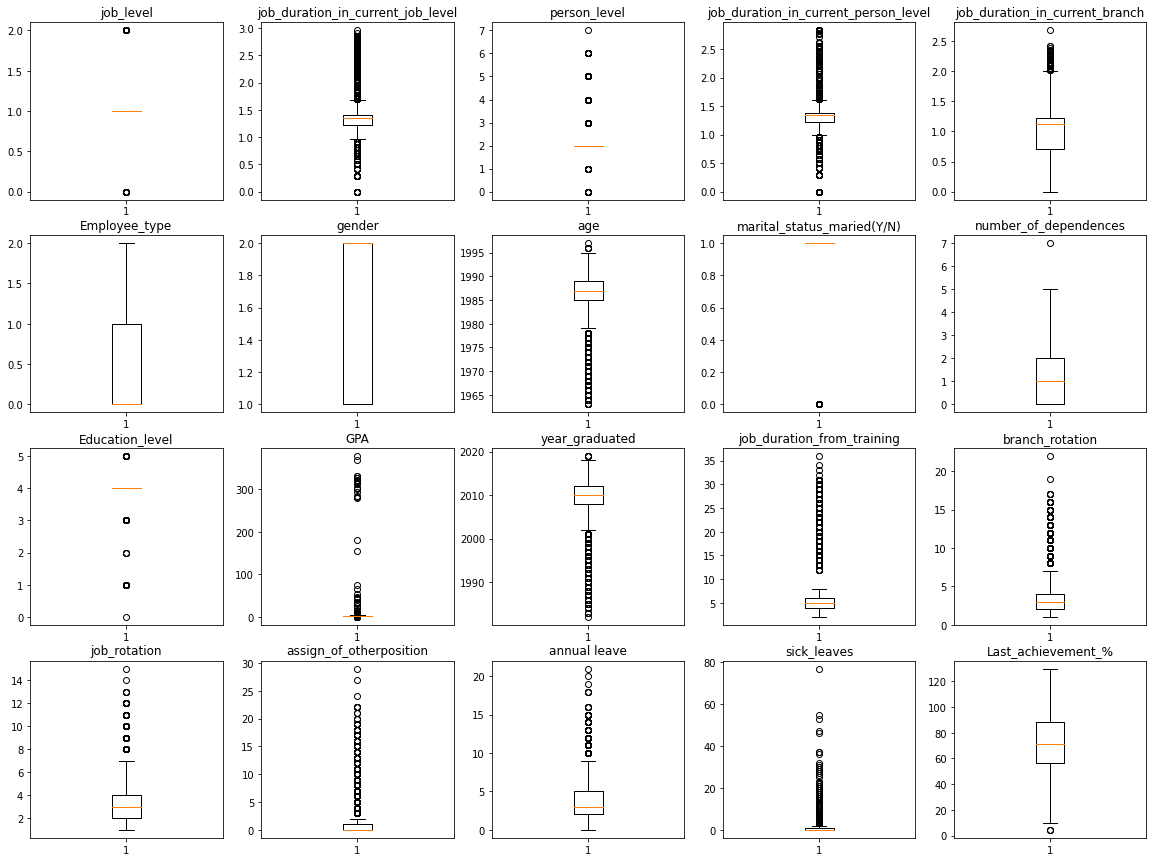

In [13]:
plt.rcParams["figure.figsize"] = [20,15]
fig, axs = plt.subplots(4, 5)
a = 0
for i in range(0,4):
  for j in range(0,5):
    # print(i, j, a)
    axs[i, j].boxplot(df_baru.iloc[:,a])
    axs[i, j].set_title(df_baru.columns[a])
    a = a+1


###define xy

In [14]:
X = df_baru.drop('Best Performance', axis=1)
y = df_baru['Best Performance']

In [15]:
common = list(set(X.columns).intersection(set(df_test.columns)))
X = X[common]
df_test = df_test[common]

In [16]:
df_test_baru = MultiColumnLabelEncoder(columns=df_test.select_dtypes(exclude=[np.number])).fit_transform(df_test)

###Model

In [17]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMModel,LGBMClassifier

In [18]:
rf = RandomForestClassifier(n_estimators=1000)

In [19]:
rf.fit(X, y)

RandomForestClassifier(n_estimators=1000)

In [20]:
xgbrf = xgb.XGBRFClassifier(n_estimators=1000)

In [21]:
xgbrf.fit(X, y)

D:\Sinau\BRI people analytic\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:05:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=1000, n_jobs=20, num_parallel_tree=1000,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)

In [22]:
# lbgm = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
#                importance_type='split', learning_rate=0.1, max_depth=-1,
#                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
#                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
#                random_state=2641, reg_alpha=0.0, reg_lambda=0.0, silent=True,
#                subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lbgm = LGBMClassifier(n_estimators=1000)

In [23]:
lbgm.fit(X, y)

LGBMClassifier(n_estimators=1000)

In [25]:
score1 = cross_val_score(rf, X, y, cv=5, scoring="roc_auc", n_jobs=-1)
score2 = cross_val_score(xgbrf, X, y, cv=5, scoring="roc_auc", n_jobs=-1)
score3 = cross_val_score(lbgm, X, y, cv=5, scoring="roc_auc", n_jobs=-1)
print("RF ROC-AUC Mean Score: ", np.mean(score1))
print("XGBRF ROC-AUC Mean Score: ", np.mean(score2))
print("LBGM ROC-AUC Mean Score: ", np.mean(score3))


RF ROC-AUC Mean Score:  0.5604451150853593
XGBRF ROC-AUC Mean Score:  0.5720932001649458
LBGM ROC-AUC Mean Score:  0.5472047567123595


In [37]:
##Helper function to create submission file
def submit(model, data_test, col, file_name):
    result = model.predict_proba(data_test)[:,1]
    result = pd.DataFrame(result, columns=['col'])
    result.index.name='index'
    result.to_csv(file_name+'.csv')

In [38]:
submit(xgbrf, df_test_baru, 'Best Performance', 'coba1')

###Random Search Algorithm

In [26]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [27]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

####Random Forest

In [28]:
rf2= RandomForestClassifier()

In [29]:
space_rf = dict()

space_rf['bootstrap'] = [True, False]
space_rf['n_estimators'] = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
space_rf['criterion'] = ['gini', 'entropy']
space_rf['max_features'] = ['auto', 'sqrt', 'log2']
space_rf['max_depth'] = [int(x) for x in np.linspace(10, 110, num = 11)]
space_rf['min_samples_split'] = [2, 5, 10]
space_rf['min_samples_leaf'] = [1, 2, 4]

In [35]:
search_rf = RandomizedSearchCV(rf2, space_rf, n_iter=500, scoring='roc_auc', n_jobs=-1, cv=cv, random_state=1, verbose=1)

In [36]:
rf_rsa = search_rf.fit(X, y)

Fitting 30 folds for each of 500 candidates, totalling 15000 fits


In [37]:
print('Best Score: %s' % rf_rsa.best_score_)
print('Best Hyperparameters: %s' % rf_rsa.best_params_)

Best Score: 0.5850632839217766
Best Hyperparameters: {'n_estimators': 944, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': True}


In [ ]:
submit(rf_rsa, df_test_baru, 'Best Performance', 'rf_rsa_m1')

####XGBRF

In [28]:
xgbrf2 = xgb.XGBRFClassifier()

In [29]:
space_xgbrf = dict()
space_xgbrf['n_estimators'] = [10, 100, 1000]
space_xgbrf['learning_rate'] = [0.001, 0.01, 0.1]
space_xgbrf['subsample'] = [0.5, 0.7, 1.0]

# max_depth = [3, 7, 9]

In [30]:
search_xgbrf = RandomizedSearchCV(xgbrf2, space_xgbrf, n_iter=500, scoring='roc_auc', n_jobs=-1, cv=cv, random_state=1, verbose=1)

In [33]:
result_xgbrf2 = search_xgbrf.fit(X, y, eval_metric='logloss')

D:\Sinau\BRI people analytic\env\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 27 is smaller than n_iter=500. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 30 folds for each of 27 candidates, totalling 810 fits


D:\Sinau\BRI people analytic\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [35]:
print('Best Score: %s' % result_xgbrf2.best_score_)
print('Best Hyperparameters: %s' % result_xg2brf.best_params_)

Best Score: 0.5865366658028073
Best Hyperparameters: {'subsample': 0.5, 'n_estimators': 1000, 'learning_rate': 0.001}


In [ ]:
# submit(result_xgbrf2, df_test_baru, 'Best Performance', 'rf_rsa_m1')

##lgbmclassifier

In [40]:
# lgbm2 = LGBMClassifier()

In [39]:
# space_lgmb = dict()
# space_lgmb['n_estimators'] = [10, 100, 1000]
# space_lgmb['learning_rate'] = [0.001, 0.01, 0.1]
# space_lgmb['subsample'] = [0.5, 0.7, 1.0]

# # max_depth = [3, 7, 9]

In [43]:
!kaggle competitions submit -c bri-data-hackathon-pa -f "D:\Sinau\BRI people analytic\rf_rsa_m1.csv" -m "submit rf rsa m1"

Successfully submitted to BRI Data Hackathon - People Analytics



  0%|          | 0.00/150k [00:00<?, ?B/s]
 53%|#####3    | 80.0k/150k [00:00<00:00, 688kB/s]
100%|##########| 150k/150k [00:00<00:00, 266kB/s] 
100%|##########| 150k/150k [00:06<00:00, 23.5kB/s]
